In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the same directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [ ]:
#Loading data to pandas Data Frame
period=pd.read_csv("./Period.csv")
symptom=pd.read_csv("./Symptom.csv")
user=pd.read_csv("./User.csv")

In [3]:
period.head()

id start_date end_date  User_id
0  352     5/4/15  10/4/15      252
1  353    23/3/15  27/3/15      253
2  354     6/4/15  11/4/15      254
3  355    21/3/15  24/3/15      255
4  356    26/3/15  31/3/15      256

In [4]:
symptom.head()

id  user_id  acne  backache  bloating  cramp  diarrhea  dizzy  headache  \
0  127      252     0         0         0      0         0      0         0   
1  128      257     0         0         0     46         0      0         0   
2  129      257     0         0         0      0         0     27        48   
3  130      263     0         0         0      0         0      0         0   
4  132      269     0         0         0      0         0      0         0   

   mood  nausea  sore     date  
0     0       0     0  11/4/15  
1     0       0     0  10/4/15  
2     0       0     0  11/4/15  
3     0       0     0  11/4/15  
4     0       0     0  11/4/15

In [5]:
user.head()

id  dob  cycle_length_initial  period_length_initial
0  252  NaN                    28                      6
1  253  NaN                    30                      5
2  254  NaN                    28                      6
3  255  NaN                    30                      4
4  256  NaN                    25                      6

In [6]:
#Merging period,Symptom an User data frames ,using UserId as foreign Key
period_symptom=pd.merge(symptom, period, left_on='user_id',right_on='User_id',how="outer")
period_symptom_user=pd.merge(period_symptom,user,left_on='user_id',right_on='id',how="outer")
period_symptom_user.head()

id_x  user_id  acne  backache  bloating  cramp  diarrhea  dizzy  headache  \
0  127.0    252.0   0.0       0.0       0.0    0.0       0.0    0.0       0.0   
1  142.0    252.0  50.0      50.0       0.0    0.0       0.0    0.0       0.0   
2  171.0    252.0   0.0       0.0       0.0    0.0       0.0    0.0       0.0   
3  128.0    257.0   0.0       0.0       0.0   46.0       0.0    0.0       0.0   
4  128.0    257.0   0.0       0.0       0.0   46.0       0.0    0.0       0.0   

   mood          ...            sore     date   id_y  start_date end_date  \
0   0.0          ...             0.0  11/4/15  352.0      5/4/15  10/4/15   
1   0.0          ...             0.0  13/4/15  352.0      5/4/15  10/4/15   
2   0.0          ...             0.0  17/4/15  352.0      5/4/15  10/4/15   
3   0.0          ...             0.0  10/4/15  357.0     10/3/15  15/3/15   
4   0.0          ...             0.0  10/4/15  358.0     11/4/15  15/4/15   

  User_id     id  dob cycle_length_initial  period_length_initial  
0   252.0  252.0  NaN                 28.0                    6.0  
1   252.0  252.0  NaN                 28.0                    6.0  
2   252.0  252.0  NaN                 28.0                    6.0  
3   257.0  257.0  NaN                 30.0                    6.0  
4   257.0  257.0  NaN                 30.0                    6.0  

[5 rows x 21 columns]

In [7]:
#Dropping id_x,id_y,User_id,id as data is already merged and we dont need them to analysis
period_symptom_user.drop('id_x', axis=1, inplace=True)
period_symptom_user.drop('id_y', axis=1, inplace=True)
period_symptom_user.drop('User_id', axis=1, inplace=True)
period_symptom_user.drop('id', axis=1, inplace=True)

period_symptom_user.head()


user_id  acne  backache  bloating  cramp  diarrhea  dizzy  headache  mood  \
0    252.0   0.0       0.0       0.0    0.0       0.0    0.0       0.0   0.0   
1    252.0  50.0      50.0       0.0    0.0       0.0    0.0       0.0   0.0   
2    252.0   0.0       0.0       0.0    0.0       0.0    0.0       0.0   0.0   
3    257.0   0.0       0.0       0.0   46.0       0.0    0.0       0.0   0.0   
4    257.0   0.0       0.0       0.0   46.0       0.0    0.0       0.0   0.0   

   nausea  sore     date start_date end_date  dob  cycle_length_initial  \
0     0.0   0.0  11/4/15     5/4/15  10/4/15  NaN                  28.0   
1     0.0   0.0  13/4/15     5/4/15  10/4/15  NaN                  28.0   
2     0.0   0.0  17/4/15     5/4/15  10/4/15  NaN                  28.0   
3     0.0   0.0  10/4/15    10/3/15  15/3/15  NaN                  30.0   
4     0.0   0.0  10/4/15    11/4/15  15/4/15  NaN                  30.0   

   period_length_initial  
0                    6.0  
1                    6.0  
2                    6.0  
3                    6.0  
4                    6.0

In [8]:
#Total No of columns
len(period_symptom_user)

205599

In [9]:
#Cheking the Count Of each Column Null Values vs Total Data
period_symptom_user.isnull().sum().sort_values(ascending=False).head(10)

dob         162260
end_date     16315
date         10363
mood         10362
dizzy        10362
acne         10362
backache     10362
bloating     10362
cramp        10362
diarrhea     10362
dtype: int64

In [10]:
#Since out 205599 162260 values of date of birth are null hence Dropping the Date of birth.
period_symptom_user.drop('dob', axis=1, inplace=True)
#Also End date is also not needed as Length of the period is already given,so dropping it. 
period_symptom_user.drop('end_date', axis=1, inplace=True)

In [11]:
period_symptom_user.head()

user_id  acne  backache  bloating  cramp  diarrhea  dizzy  headache  mood  \
0    252.0   0.0       0.0       0.0    0.0       0.0    0.0       0.0   0.0   
1    252.0  50.0      50.0       0.0    0.0       0.0    0.0       0.0   0.0   
2    252.0   0.0       0.0       0.0    0.0       0.0    0.0       0.0   0.0   
3    257.0   0.0       0.0       0.0   46.0       0.0    0.0       0.0   0.0   
4    257.0   0.0       0.0       0.0   46.0       0.0    0.0       0.0   0.0   

   nausea  sore     date start_date  cycle_length_initial  \
0     0.0   0.0  11/4/15     5/4/15                  28.0   
1     0.0   0.0  13/4/15     5/4/15                  28.0   
2     0.0   0.0  17/4/15     5/4/15                  28.0   
3     0.0   0.0  10/4/15    10/3/15                  30.0   
4     0.0   0.0  10/4/15    11/4/15                  30.0   

   period_length_initial  
0                    6.0  
1                    6.0  
2                    6.0  
3                    6.0  
4                    6.0

In [12]:
#Since we need to Predict the Period date of the user, if start_date or Symptom date is Null we connot find the date,
#Hence we are removing rows with Null Values in Start Date and Symptom Date
period_symptom_user = period_symptom_user.dropna(axis=0, subset=['start_date'])
period_symptom_user = period_symptom_user.dropna(axis=0, subset=['date'])

In [13]:
len(period_symptom_user)
#Reduced From 205599 to 195226

195226

In [14]:
#Checking Data types of the DataFrame
period_symptom_user.dtypes

user_id                  float64
acne                     float64
backache                 float64
bloating                 float64
cramp                    float64
diarrhea                 float64
dizzy                    float64
headache                 float64
mood                     float64
nausea                   float64
sore                     float64
date                      object
start_date                object
cycle_length_initial     float64
period_length_initial    float64
dtype: object

In [15]:
#Since Dates are in object Type we need to convert into date format
period_symptom_user['start_date'] = pd.to_datetime(period_symptom_user['start_date'], format = "%d/%m/%y")
period_symptom_user['date']=pd.to_datetime(period_symptom_user['date'], format = "%d/%m/%y")


In [16]:
#Now Date is Converted into Date Time 
period_symptom_user.dtypes

user_id                         float64
acne                            float64
backache                        float64
bloating                        float64
cramp                           float64
diarrhea                        float64
dizzy                           float64
headache                        float64
mood                            float64
nausea                          float64
sore                            float64
date                     datetime64[ns]
start_date               datetime64[ns]
cycle_length_initial            float64
period_length_initial           float64
dtype: object

In [17]:
#To perform regression we need to convert date into Ordinal values(Date in ordinal format)
import datetime as dt
period_symptom_user['start_date']=period_symptom_user['start_date'].map(dt.datetime.toordinal)
period_symptom_user['date']=period_symptom_user['date'].map(dt.datetime.toordinal)

In [18]:
#Now Date Time is converted into Ordinal Format Which is in Integer ,with which we can do regression
period_symptom_user.dtypes

user_id                  float64
acne                     float64
backache                 float64
bloating                 float64
cramp                    float64
diarrhea                 float64
dizzy                    float64
headache                 float64
mood                     float64
nausea                   float64
sore                     float64
date                       int64
start_date                 int64
cycle_length_initial     float64
period_length_initial    float64
dtype: object

In [19]:
#Seperating Dependent and  Independent Variables
#In our case Indepent Variable is Period Date
x=period_symptom_user.filter(['acne','backache','bloating','cramp','diarrhea','dizzy','headache','mood','nausea','sore','date','cycle_length_initial','period_length_initial'])
y=period_symptom_user.filter(['start_date'])

In [20]:
x.head()

acne  backache  bloating  cramp  diarrhea  dizzy  headache  mood  nausea  \
0   0.0       0.0       0.0    0.0       0.0    0.0       0.0   0.0     0.0   
1  50.0      50.0       0.0    0.0       0.0    0.0       0.0   0.0     0.0   
2   0.0       0.0       0.0    0.0       0.0    0.0       0.0   0.0     0.0   
3   0.0       0.0       0.0   46.0       0.0    0.0       0.0   0.0     0.0   
4   0.0       0.0       0.0   46.0       0.0    0.0       0.0   0.0     0.0   

   sore    date  cycle_length_initial  period_length_initial  
0   0.0  735699                  28.0                    6.0  
1   0.0  735701                  28.0                    6.0  
2   0.0  735705                  28.0                    6.0  
3   0.0  735698                  30.0                    6.0  
4   0.0  735698                  30.0                    6.0

In [21]:
y.head()

start_date
0      735693
1      735693
2      735693
3      735667
4      735699

C:\Users\pavan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.06107962 0.0538544  0.05881654 0.08091156 0.03725685 0.0313316
 0.05728931 0.06297774 0.03412533 0.05027107 0.27096747 0.07485845
 0.12626007]


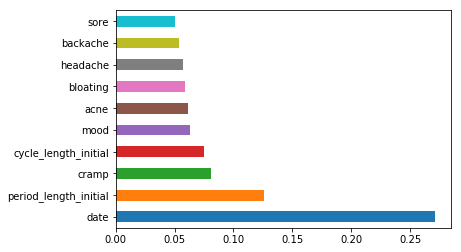

In [23]:
#Plotting the Importance of Features 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

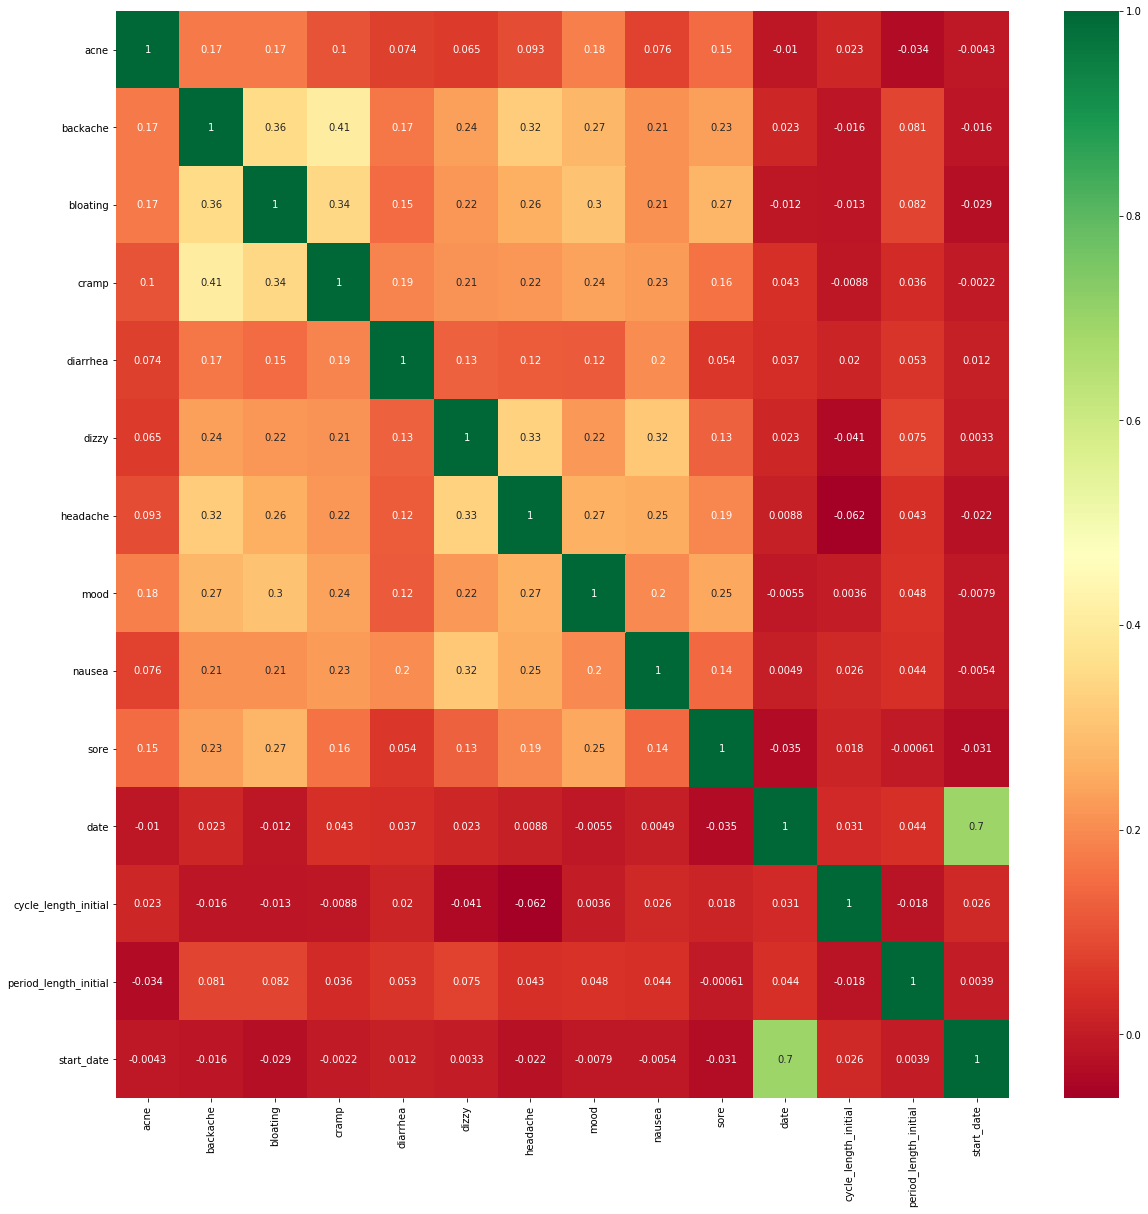

In [24]:
#Observing the Corelations
import seaborn as sns
x_y=pd.merge(x,y,left_index=True, right_index=True)
corrmat = x_y.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_y[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
# import train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
y_train_pred=np.round(y_train_pred)
y_pred=np.round(y_pred)

In [34]:
from sklearn.metrics import r2_score

print("Train acc: " , r2_score(y_train, y_train_pred))
print("Test acc: ", r2_score(y_test, y_pred))

Train acc:  0.465494936062711
Test acc:  0.5497170318167495


In [35]:
y_pred

array([[736425.],
       [736990.],
       [736810.],
       ...,
       [736800.],
       [736748.],
       [736440.]])

In [54]:
import datetime
date = datetime.date.today()
y_pred_normal_DateFormat=[]
for row in y_pred:
    y_pred_normal_DateFormat.append(date.fromordinal(int(row[0])).strftime('%m/%d/%y'))
    

print(date.fromordinal(735693))

2015-04-05


In [58]:
y_pred_normal_DateFormat=pd.DataFrame(y_pred_normal_DateFormat)
y_pred_normal_DateFormat.head()


0
0  04/06/17
1  10/23/18
2  04/26/18
3  10/23/17
4  12/04/17